In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Pre-Processing

In [3]:
df = pd.read_csv("./data/creditcard.csv")
df["Class"] = pd.Categorical(df["Class"])
df.shape

(284807, 31)

## Visualization (EDA)

Dataset contains 30 features. Apart from 'Time' and 'Amount', other 28 features are results of PCA. Hence correlation is nearly 0.

Text(0.5, 1.0, 'Correlation Heatmap')

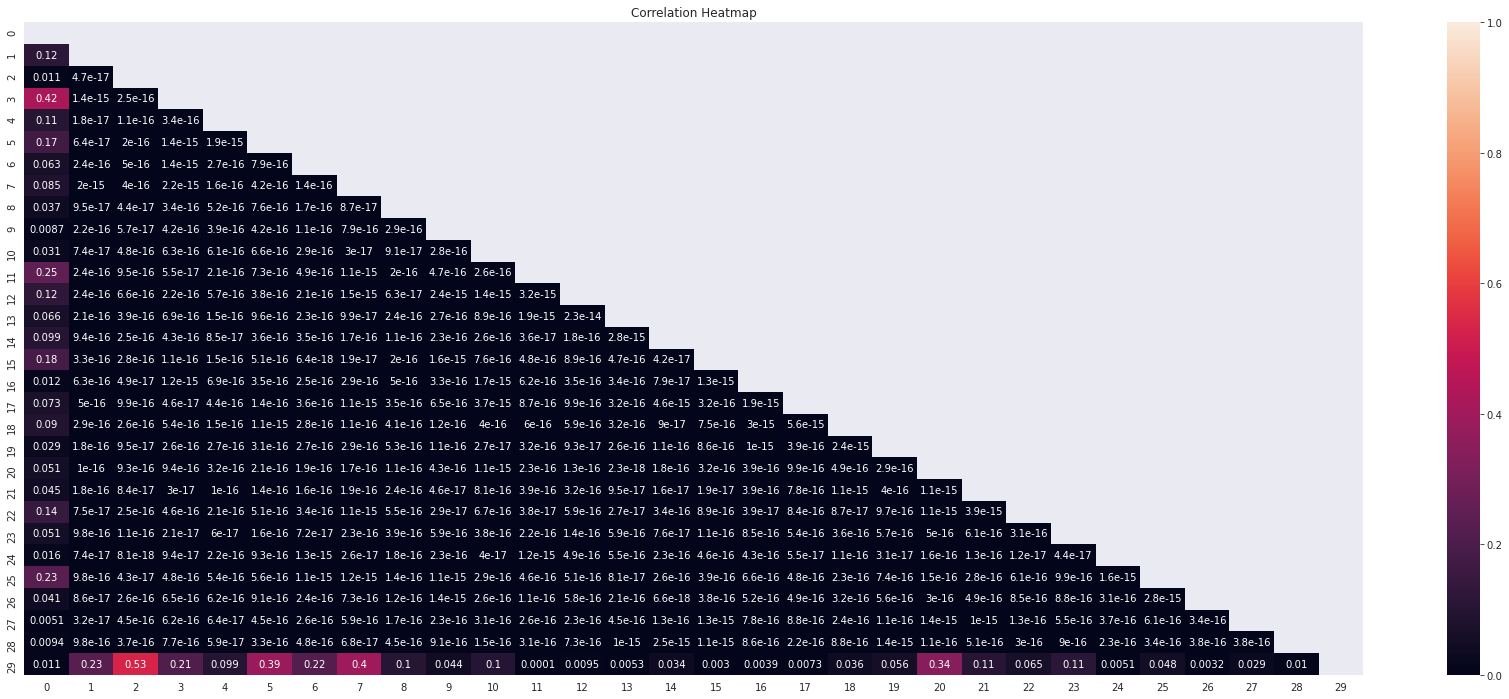

In [4]:
plt.figure(figsize=(30, 12))
sns.heatmap(np.tril(abs(df.corr())), vmin=0, vmax=1, mask=np.triu(df.corr()), annot=True).set_title("Correlation Heatmap")

When we investigate the mean values for features that belong to either 'Legitimate' or 'Fradulent' cases, for some reason, mean values for 'Legitimate' cases are very low compared to 'Fradulent' cases.

In [5]:
df[df["Class"] == 0].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [6]:
df[df["Class"] == 1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000


The dataset is extremely imbalanced (1 to ~587). But this is expected for a fraud detection training. Fradulent cases will be extremely imbalanced in real life data as well.

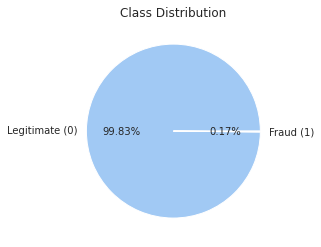

0    284315
1       492
Name: Class, dtype: int64

Baseline AUPRC Score: 0.0017304750013189597


In [7]:
counts = [df[df["Class"] == 0].shape[0], df[df["Class"] == 1].shape[0]]
labels = ["Legitimate (0)", "Fraud (1)"]

plt.pie(counts, labels=labels, colors = sns.color_palette('pastel')[:len(counts)], autopct="%.2f%%")
plt.title("Class Distribution")
plt.show()

print(df["Class"].value_counts())

print("\nBaseline AUPRC Score: {}".format(counts[1] / counts[0]))

There is a very interesting result showing in the barplots. It looks like 'Legitimate' cases' means are (-1)/'Fradulent' means. Of course this is a wild interpretation.<br>
But one thing for sure is ('Legitimate' means) * ('Fraudulent' means) < 0.

Text(0.5, 1.0, 'Fradulent')

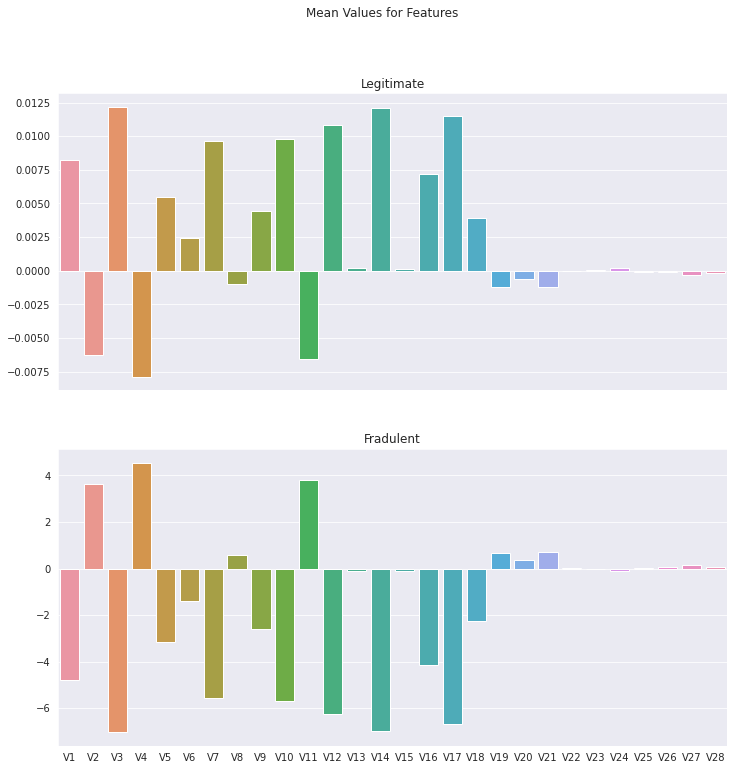

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
fig.suptitle("Mean Values for Features")

sns.barplot(x=np.mean(df[df["Class"] == 0].iloc[:, 1:-2]).index, y=np.mean(df[df["Class"] == 0].iloc[:, 1:-2]).values, ax=axes[0]).set_title("Legitimate")
sns.barplot(x=np.mean(df[df["Class"] == 1].iloc[:, 1:-2]).index, y=np.mean(df[df["Class"] == 1].iloc[:, 1:-2]).values, ax=axes[1]).set_title("Fradulent")

Looking at the results below, I expected to see -1's all around. Since this is not the case, my insight from before is proven false.

In [9]:
np.mean(df[df["Class"] == 0].iloc[:, 1:-2]) * np.mean(df[df["Class"] == 1].iloc[:, 1:-2])

V1    -3.940550e-02
V2    -2.272420e-02
V3    -8.560148e-02
V4    -3.569975e-02
V5    -1.718399e-02
V6    -3.380773e-03
V7    -5.366336e-02
V8    -5.634865e-04
V9    -1.152876e-02
V10   -5.576802e-02
V11   -2.499033e-02
V12   -6.780001e-02
V13   -2.068590e-05
V14   -8.410960e-02
V15   -1.494395e-05
V16   -2.965887e-02
V17   -7.689084e-02
V18   -8.731804e-03
V19   -8.017240e-04
V20   -2.398814e-04
V21   -8.811723e-04
V22   -3.415457e-07
V23   -2.811558e-06
V24   -1.912587e-05
V25   -2.972974e-06
V26   -4.616092e-06
V27   -5.034948e-05
V28   -9.907902e-06
dtype: float64

## Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df["Class"], test_size=0.2, stratify=df["Class"], random_state=42)

print(X_train.shape)
print(X_test.shape)

(227845, 30)
(56962, 30)


## Undersampling

To battle class imbalance, it is possible to apply undersampling methods to remove samples from the majority class.<br>
I will use imblearn which is compatible with scikit-learn and is part of scikit-learn-contrib projects.<br>
I will train the models on undersampled data then make prediction on standard X_train. If I were to test the model on undersampled data as well the whole point of undersampling would be void. At the end of the day, goal is trying to build a model that can predict X_test.<br>

### Random Undersampling

Randomly select n rows from the majority class where n is the number of minority rows.

In [11]:
undersampled_df = df[df["Class"] == 1]
undersampled_df = undersampled_df.append(((df.sample(frac=1).reset_index(drop=True))[df["Class"] == 0]).iloc[:undersampled_df.shape[0],:], ignore_index=True)

print("Undersampled DataFrame has {} legitimate cases, {} fraudulent cases.".format(undersampled_df["Class"].value_counts()[0], undersampled_df["Class"].value_counts()[1]))

undersampled_X_train, undersampled_X_test, undersampled_y_train, undersampled_y_test = train_test_split(undersampled_df.iloc[:, :-1], undersampled_df["Class"], test_size=0.2, stratify=undersampled_df["Class"], random_state=42)

Undersampled DataFrame has 492 legitimate cases, 492 fraudulent cases.


### NearMiss

Majority class examples with minimum distance to each minority class example.<br>

In [12]:
from imblearn.under_sampling import NearMiss

undersampler = NearMiss(version=1, n_neighbors=3)
nearmiss_X, nearmiss_y = undersampler.fit_resample(df.iloc[:, :-1], df["Class"])

nearmiss_X_train, nearmiss_X_test, nearmiss_y_train, nearmiss_y_test = train_test_split(nearmiss_X, nearmiss_y, test_size=0.2, stratify=nearmiss_y, random_state=42)

### CondensedNearestNeigbour

An undersampling technique that seeks a subset of a collection of samples that results in no loss in model performance, referred to as a minimal consistent set.<br>
It is achieved by enumerating the examples in the dataset and adding them to the “store” only if they cannot be classified correctly by the current contents of the store using KNN.<br>
This the dataset I am using is too large for KNN, this undersampling method takes too long for me to test it.<br>

from imblearn.under_sampling import CondensedNearestNeighbour

undersampler = CondensedNearestNeighbour(n_neighbors=1)
cnn_X, cnn_y = undersampler.fit_resample(df.iloc[:, :-1], df["Class"])

cnn_X_train, cnn_X_test, cnn_y_train, cnn_y_test = train_test_split(cnn_X, cnn_y, test_size=0.2, stratify=cnn_y, random_state=42)

# Modeling

Since the data is extremely imbalanced, accuracy is not a good indicator of model performance. AUPRC score is used for imbalanced datasets. Since baseline AUPRC is 0.0017, getting a 0.88 score is incredible.

In [13]:
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import make_scorer, roc_auc_score

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

## XGBoost

In [14]:
from xgboost import XGBClassifier

booster="gbtree" has the higher accuracy compared to "gblinear" as it uses linear functions.<br>
tree_method="hist" is 10 times faster than "auto" method.<br>
objective="binary:logistic" for binary classification.<br>
eval_metric="auc" because of extreme class imbalance.<br>
seed=42 for tuning the model. (seed is random_state in scikit).<br>

### Results on X_test

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



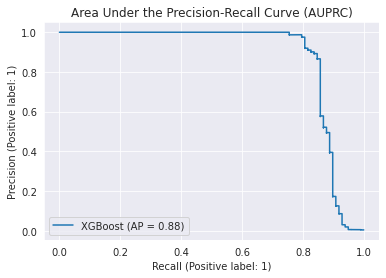

In [15]:
xgb = make_pipeline(StandardScaler(), XGBClassifier(booster="gbtree", tree_method="hist", objective="binary:logistic", seed=42, use_label_encoder=False, eval_metric="auc"))
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, xgb_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, xgb_proba, name="XGBoost").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### Results of Undersampling

Undersampling with XGBoost gives respectable results, but standard data still scores higher.

#### Random Undersampling

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.99      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.97      0.52     56962
weighted avg       1.00      0.95      0.97     56962



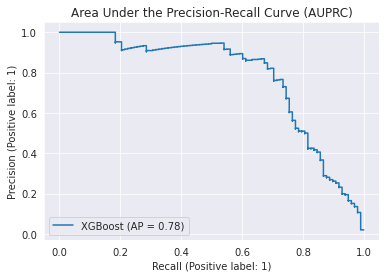

In [16]:
xgb = make_pipeline(StandardScaler(), XGBClassifier(booster="gbtree", tree_method="hist", objective="binary:logistic", seed=42, use_label_encoder=False, eval_metric="error"))
xgb.fit(undersampled_X_train, undersampled_y_train)

xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, xgb_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, xgb_proba, name="XGBoost").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

#### NearMiss Undersampling

              precision    recall  f1-score   support

           0       1.00      0.53      0.69     56864
           1       0.00      0.99      0.01        98

    accuracy                           0.53     56962
   macro avg       0.50      0.76      0.35     56962
weighted avg       1.00      0.53      0.69     56962



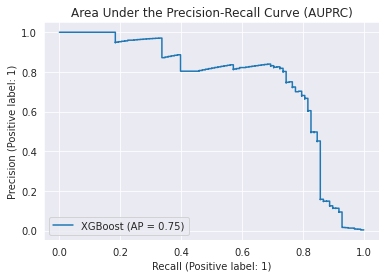

In [17]:
xgb = make_pipeline(StandardScaler(), XGBClassifier(booster="gbtree", tree_method="hist", objective="binary:logistic", seed=42, use_label_encoder=False, eval_metric="error"))
xgb.fit(nearmiss_X_train, nearmiss_y_train)

xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, xgb_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, xgb_proba, name="XGBoost").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

### Results on X_test

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.79      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



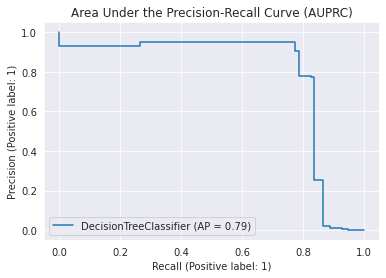

In [19]:
dtc = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=5, min_samples_split=2, max_leaf_nodes=None, criterion="entropy", random_state=42))
dtc.fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, dtc_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, dtc_proba, name="DecisionTreeClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### Results of Undersampling

From the results, I can say without a doubt decision trees are not meant for undersampling.

#### Random Undersampling

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.96      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.94      0.50     56962
weighted avg       1.00      0.92      0.95     56962



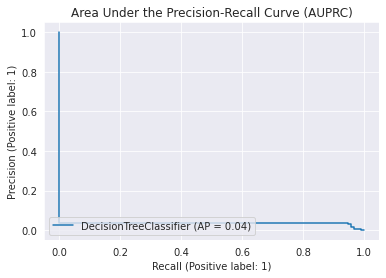

In [20]:
dtc = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=5, min_samples_split=2, max_leaf_nodes=None, criterion="entropy", random_state=42))
dtc.fit(undersampled_X_train, undersampled_y_train)

dtc_pred = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, dtc_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, dtc_proba, name="DecisionTreeClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

#### NearMiss Undersampling

              precision    recall  f1-score   support

           0       1.00      0.56      0.72     56864
           1       0.00      0.94      0.01        98

    accuracy                           0.56     56962
   macro avg       0.50      0.75      0.36     56962
weighted avg       1.00      0.56      0.72     56962



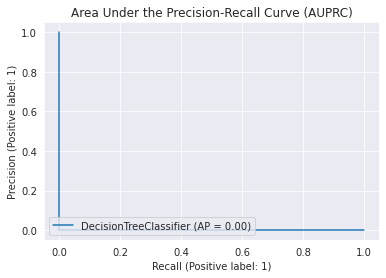

In [21]:
dtc = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=5, min_samples_split=2, max_leaf_nodes=None, criterion="entropy", random_state=42))
dtc.fit(nearmiss_X_train, nearmiss_y_train)

dtc_pred = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, dtc_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, dtc_proba, name="DecisionTreeClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

## RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

criterion="entropy" because it has higher AUPRC score than "gini".<br>
Other hyperparameters do not seem to have measurable effects.<br>

### Results on X_test

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.84      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



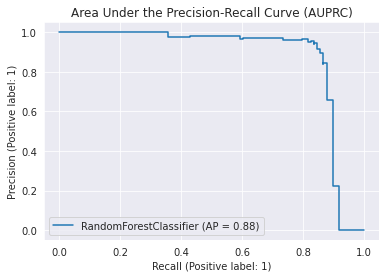

In [23]:
rfc = make_pipeline(StandardScaler(), RandomForestClassifier(criterion="entropy", n_jobs=-1, random_state=42))
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, rfc_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, rfc_proba, name="RandomForestClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### Results of Undersampling

When undersampled, similar to other models, precision is just too low.

#### Random Undersampling

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.99      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.98      0.55     56962
weighted avg       1.00      0.97      0.98     56962



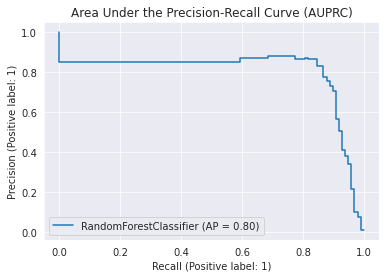

In [24]:
rfc = make_pipeline(StandardScaler(), RandomForestClassifier(criterion="entropy", n_jobs=-1, random_state=42))
rfc.fit(undersampled_X_train, undersampled_y_train)

rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, rfc_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, rfc_proba, name="RandomForestClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

#### NearMiss Undersampling

Better than random undersampling, yet worse than not-undersampled training.

              precision    recall  f1-score   support

           0       1.00      0.57      0.73     56864
           1       0.00      0.99      0.01        98

    accuracy                           0.57     56962
   macro avg       0.50      0.78      0.37     56962
weighted avg       1.00      0.57      0.72     56962



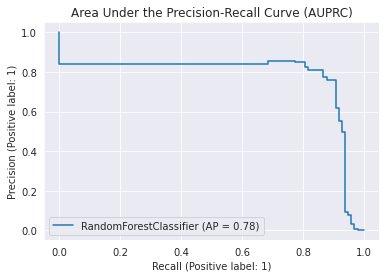

In [25]:
rfc = make_pipeline(StandardScaler(), RandomForestClassifier(criterion="entropy", n_jobs=-1, random_state=42))
rfc.fit(nearmiss_X_train, nearmiss_y_train)

rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, rfc_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, rfc_proba, name="RandomForestClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

## SGDClassifier with Kernel Approximation

scikit-learn docs suggeest using SGDClassifier for large datasets(>100000). It is fast, but has low AUPRC score.

In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import PolynomialCountSketch

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.54      0.65        98

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



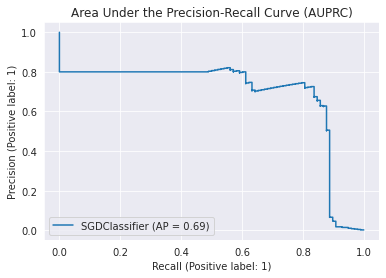

In [27]:
sgd = make_pipeline(StandardScaler(), SGDClassifier(loss="log", random_state=42))
sgd.fit(X_train, y_train)

sgd_pred = sgd.predict(X_test)
sgd_proba = sgd.predict_proba(X_test)[:, 1]

print(classification_report(y_test, sgd_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, sgd_proba, name="SGDClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.50      0.64        98

    accuracy                           1.00     56962
   macro avg       0.94      0.75      0.82     56962
weighted avg       1.00      1.00      1.00     56962



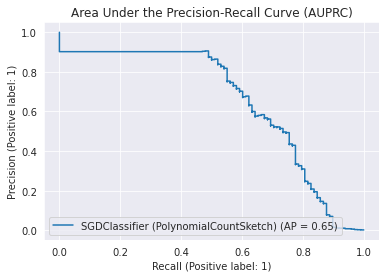

In [28]:
pcs_feature = PolynomialCountSketch(gamma=1.0, degree=2, n_components=100, random_state=42)
X_features = pd.DataFrame(pcs_feature.fit_transform(X_train))

sgd = make_pipeline(StandardScaler(), SGDClassifier(loss="log", random_state=42))
sgd.fit(X_features, y_train)

sgd_pred = sgd.predict(pd.DataFrame(pcs_feature.fit_transform(X_test)))
sgd_proba = sgd.predict_proba(pd.DataFrame(pcs_feature.fit_transform(X_test)))[:, 1]

print(classification_report(y_test, sgd_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, sgd_proba, name="SGDClassifier (PolynomialCountSketch)").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

## Resources

https://glassboxmedicine.com/2019/03/02/measuring-performance-auprc/<br>
https://scikit-learn.org/stable/modules/grid_search.html<br>
https://www.mastersindatascience.org/learning/statistics-data-science/undersampling/<br>
https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/<br>